In [1]:
# affiche tous les résultats d'une cellule, et pas uniquement le dernier
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# TP d'introduction à NetworkX

[NetworkX](https://networkx.org/) est une bibliothèque Python dédiée à l'études des graphes et des réseaux. La documentation officielle est disponible [ici](https://networkx.org/documentation/stable/tutorial.html).

💡 si NetworkX n'est pas présent sur votre machine, vous pouvez l'installer avec la commande `pip install networkx`.
 
 ## Premiers pas avec NetworkX
 ### Créer un graphe

Il existe plusieurs méthodes pour créer un graphe. La plus simple est de créer un graphe vide :

In [32]:
import networkx as nx

G = nx.Graph()  # ou Digraph() pour un graphe orienté

On peut aussi fournir au constructeur une liste d'arêtes / arcs :

In [33]:
edgelist = [(0, 1), (1, 2), (2, 3)]
G = nx.Graph(edgelist)

Il peut être plus pratique de fournir une matrice :

In [34]:
adjacency_matrix = np.array([[0, 1, 1, 0], [1, 0, 0, 1], [1, 0, 0, 0], [1, 1, 0, 0]])
adjacency_matrix
G = nx.Graph(adjacency_matrix, nodetype=int)
G.edges()

array([[0, 1, 1, 0],
       [1, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 1, 0, 0]])

EdgeView([(0, 1), (0, 2), (0, 3), (1, 3)])

NetworkX dispose aussi de nombreux graphes "prêts à l'emploi" ou [générateurs](https://networkx.org/documentation/stable/reference/generators.html) :

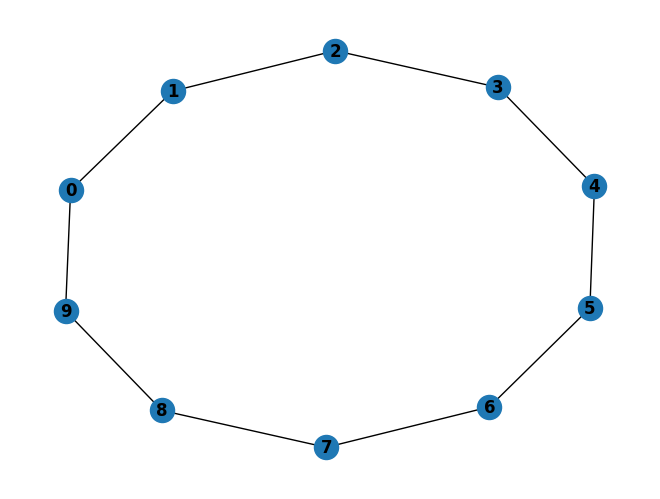

In [35]:
G = nx.cycle_graph(10)
nx.draw(G, with_labels=True, font_weight='bold')

Enfin, on peut aussi créer un graphe à partir d'un autre graphe en utilisant l'une des deux méthodes suivantes :

In [36]:
H = nx.Graph(G)
H = G.copy()

Il est bien sûr possible de construire un graphe à partir d'un fichier, qui contient par exemple les listes d'adjacences des sommets :
```
fichier adjacency_list.dat

0 1 2 3 
1 3 5
3 4
```

In [38]:
G = nx.read_adjlist('adjacency_list.dat', nodetype=int)

FileNotFoundError: [Errno 2] No such file or directory: 'adjacency_list.dat'

### Afficher un graphe

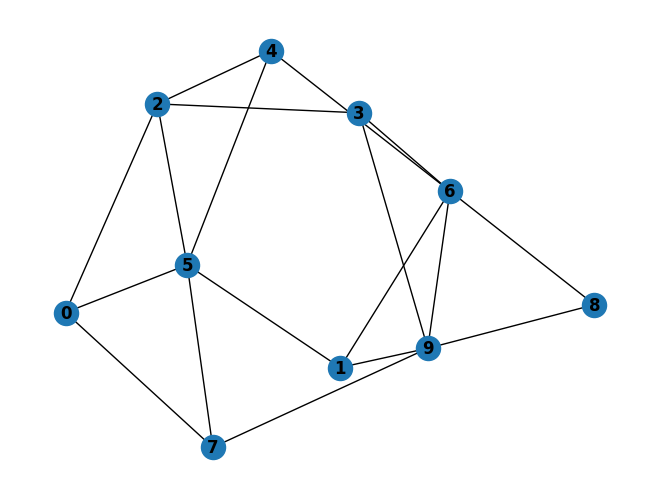

In [39]:
G = nx.gnp_random_graph(10, 0.4)
nx.draw(G, with_labels=True, font_weight='bold')

Par défaut, la position des sommets est aléatoire et change à chaque exécution. Si on demande de dessiner le même graphe une seconde fois, le résultat sera différent :

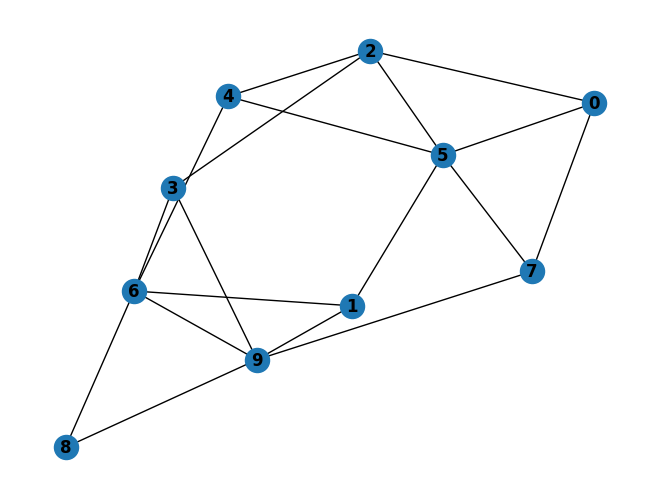

In [40]:
nx.draw(G, with_labels=True, font_weight='bold')

Il est cependant possible de spécifier explicitement les positions des noeuds, grâce aux fonctions `*_layout`. Par exemple, la fonction `random_layout` renvoie les positions aléatoires des noeuds, qu'on peut stocker pour redessiner exactement le même graphe :

{0: array([0.4837171 , 0.18038875], dtype=float32),
 1: array([0.33042997, 0.82712793], dtype=float32),
 2: array([0.6725811 , 0.55736715], dtype=float32),
 3: array([0.21382754, 0.65876406], dtype=float32),
 4: array([0.00262323, 0.6434761 ], dtype=float32),
 5: array([0.530394  , 0.14782402], dtype=float32),
 6: array([0.1920496, 0.1721582], dtype=float32),
 7: array([0.46667778, 0.40766168], dtype=float32),
 8: array([0.78165245, 0.95929515], dtype=float32),
 9: array([0.78986317, 0.29983842], dtype=float32)}

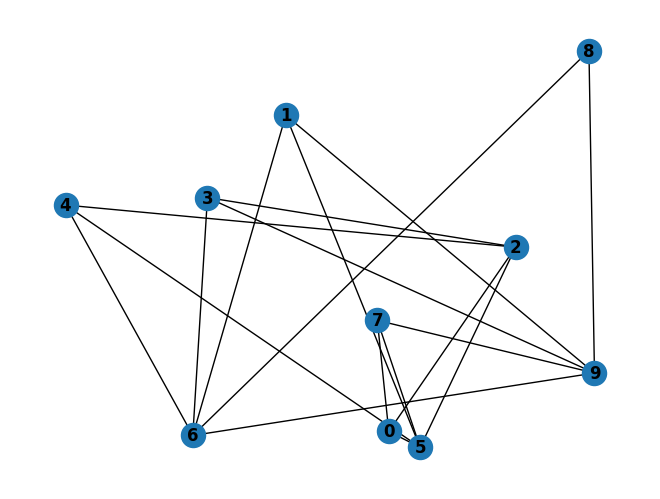

In [41]:
pos = nx.random_layout(G)
pos
nx.draw(G, pos=pos, with_labels=True, font_weight='bold')

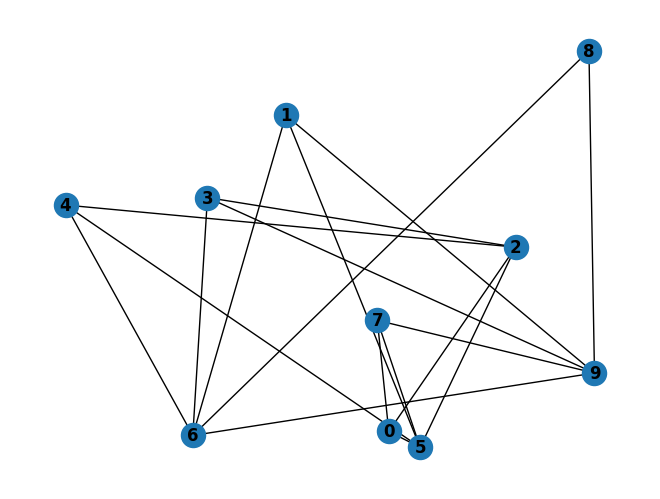

In [42]:
nx.draw(G, pos=pos, with_labels=True, font_weight='bold')

NetworkX dispose de plusieurs dispositions (ou *layouts*) prédéfinies. On peut par exemple demander une disposition des sommets circulaire :

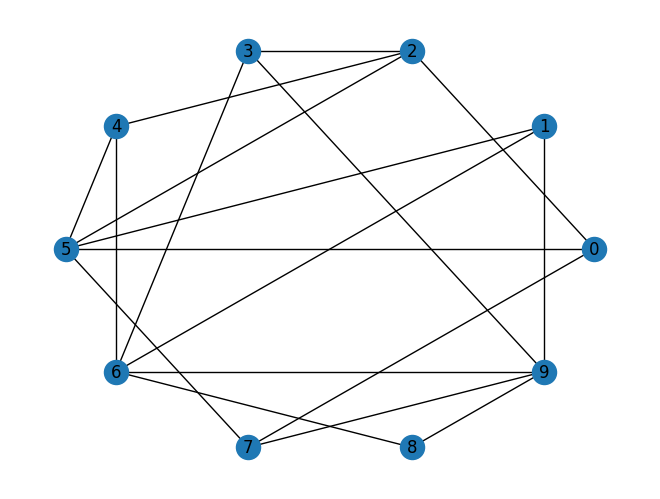

In [45]:
nx.draw_circular(G, with_labels=True)

Les possibilités sont infinies !

[0, 0, 0, 0, 0, 0, 0]

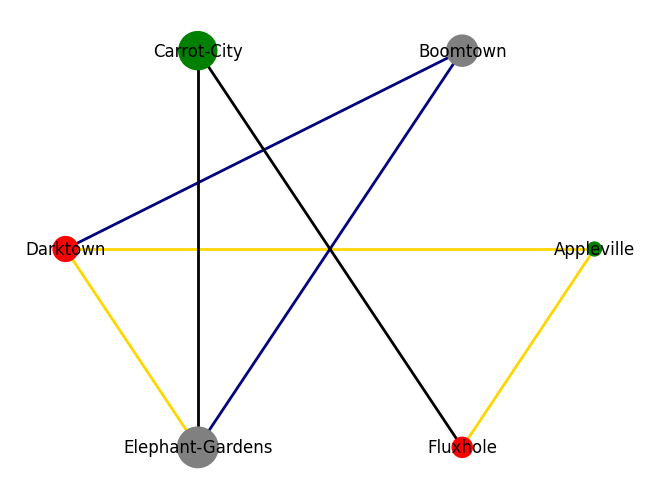

In [46]:
G = nx.MultiGraph()
G.add_nodes_from([('A', {'pop': 1000, 'lifeq': '+'}), ('B', {'pop': 5000, 'lifeq': 'o'}), \
                  ('C', {'pop': 7500, 'lifeq': '+'}), ('D', {'pop': 3200, 'lifeq': '-'}), \
                  ('E', {'pop': 8500, 'lifeq': 'o'}), ('F', {'pop': 2100, 'lifeq': '-'})])

G.add_edges_from([('A', 'D', {'speed': 'fast'}),
                  ('E', 'D', {'speed': 'fast'}),
                  ('F', 'C', {'speed': 'slow'}),
                  ('E', 'C', {'speed': 'slow'}),
                  ('B', 'D', {'speed': 'medium'}),
                  ('E', 'B', {'speed': 'medium'}),
                  ('A', 'F', {'speed': 'fast'})])

names = {'A': 'Appleville', 'B': 'Boomtown', 'C': 'Carrot-City', 'D': 'Darktown', 'E': 'Elephant-Gardens',
         'F': 'Fluxhole'}

# node size
population = [nx.get_node_attributes(G, 'pop')[node] / 10. for node in G]

# node color
color_of_quality = {'+': 'green', '-': 'red', 'o': 'grey'}
quality_colors = [color_of_quality[nx.get_node_attributes(G, 'lifeq')[node]] for node in G]

# edge color
color_of_transport = {'slow': 'black', 'medium': 'navy', 'fast': 'gold'}
transport_colors = [color_of_transport[prop['speed']] for u, v, prop in G.edges(data=True)]

nx.draw_circular(G, \
                 node_size=population, \
                 node_color=quality_colors, \
                 edge_color=transport_colors, \
                 width=2, \
                 with_labels=True, \
                 labels=names)

💡 Il est fortement conseillé de visiter le site de la principale bibliothèque Python de visualisation de données, [Matplotlib](https://matplotlib.org/).

### Ajouter des sommets ou des arêtes / arcs

In [47]:
G = nx.DiGraph()
G.add_nodes_from(range(5))
G.add_edges_from([(0, 1), (3, 4), (4, 2), (1, 3), (4, 0), (1, 2)])

💡 NetworkX se contente d'ignorer les sommets ou arêtes / arcs qui seraient éventuellement déjà présents dans le graphe.

💡 Les identifiants de sommets ne sont pas limités à des nombres : NetworkX accepte n'importe quelle donnée *hachable* (c'est-à-dire à partir de laquelle on peut calculer un identifiant), comme une chaîne de caractère, une image, un fichier XML... :

In [48]:
G = nx.Graph()
G.add_node("sommet 1")  # ajoute le sommet "sommet 1"
G.add_nodes_from("abcdef")  # adds 6 sommets: 'a', 'b', 'c', 'd', 'e', 'f'
G.add_edge(0, 'z')

### Supprimer des sommets ou des arêtes / arcs

In [49]:
G.remove_node('c')
G.remove_nodes_from("abcd")
G.remove_edge(0, 'z')

### Obtenir des renseignements sur un graphe
NetworkX dispose de nombreuses fonctions permettant d'obtenir des renseignements sur un graphe, notamment :
-   `g.degree()`  : degrés des sommets du graphe g
-   `g.number_of_nodes()`  : nombre de sommets du graphe g
-   `g.number_of_edges()`  : nombre d’arcs du graphe g
-   `g.predecessors(i)`  : liste des prédécesseurs du sommet i
-   `g.successors(i)`  : liste des successeurs du sommet i
-   `g.neighbors(i)`  : liste des voisins du sommet i

⚠️ Pour un graphe orienté, `DiGraph.neighbors` est un synonyme de `DiGraph.successors`.

In [50]:
G = nx.DiGraph()
G.add_nodes_from(range(5))
G.add_edges_from([(0, 1), (3, 4), (4, 2), (1, 3), (4, 0), (1, 2)])
G.number_of_nodes()
G.number_of_edges()
list(G.nodes)
list(G.edges)
G.degree[1]
list(G.successors(1))
list(G.predecessors(1))
list(G.neighbors(1))  # ou list(G.adj[1])

5

6

[0, 1, 2, 3, 4]

[(0, 1), (1, 3), (1, 2), (3, 4), (4, 2), (4, 0)]

3

[3, 2]

[0]

[3, 2]

### Matrices
NetworkX permet d'obtenir directement la matrice d'incidence ou d'adjacence d'un graphe :

In [51]:
nx.incidence_matrix(G).todense()
nx.adjacency_matrix(G).todense()

matrix([[1., 0., 0., 0., 0., 1.],
        [1., 1., 1., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0.],
        [0., 1., 0., 1., 0., 0.],
        [0., 0., 0., 1., 1., 1.]])

matrix([[0, 1, 0, 0, 0],
        [0, 0, 1, 1, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1],
        [1, 0, 1, 0, 0]], dtype=int32)

Il sera parfois plus commode de manipuler une autre représentation, basée sur des dictionnaires (ce qui correspond plus ou moins à une liste d'adjacence) :

In [52]:
nx.to_dict_of_dicts(G)

{0: {1: {}}, 1: {3: {}, 2: {}}, 2: {}, 3: {4: {}}, 4: {2: {}, 0: {}}}

## Exercice 1

Dans la suite, vous aurez besoin des packages `networkx`, `matplotlib` et `scipy`. Installez-les à l'aide de la commande `pip install *package*` (dans un terminal) si vous ne les avez pas sur votre machine.

In [56]:
!pip install networkx[default] numpy matplotlib scipy
import networkx as nx
import scipy as sp
import matplotlib.pyplot as plt


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Q1 : Créez le graphe de Petersen en donnant explicitement la liste de ses arêtes

In [85]:
def create_petersen_graph():
    # Créez un graphe vide
    graph = nx.Graph()

    # Ajoutez les noeuds
    graph.add_nodes_from(range(10))

    # Ajoutez les arêtes du graphe de Petersen
    edges = [
        (0, 1), (1, 2), (2, 3), (3, 4), (4, 0),  # Arêtes extérieures
        (0, 5), (1, 6), (2, 7), (3, 8), (4, 9),  # Arêtes reliant les sommets extérieurs et intérieurs
        (5, 7), (7, 9), (9, 6), (6, 8), (8, 5)  # Arêtes intérieures
    ]
    graph.add_edges_from(edges)

    return graph

Q2 : Affichez le graphe créé, en indiquant les numéros de sommets en gras

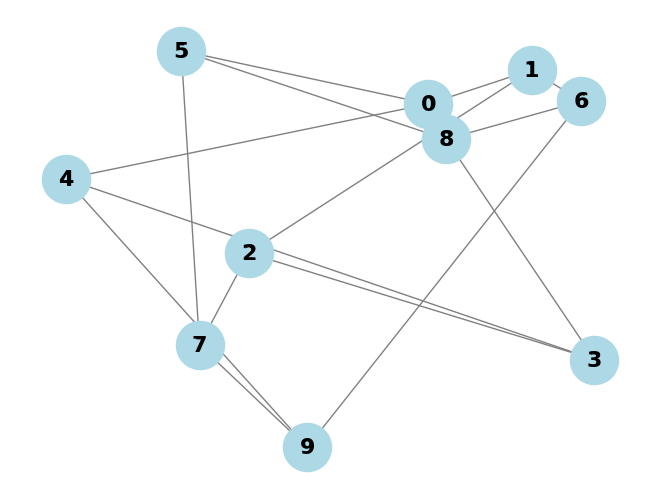

In [92]:
def draw_petersen_graph(graph, pos=None):
    if pos is None:
        # pos aléatoire
        pos = nx.random_layout(graph)

    # Dessinez le graphe de Petersen
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1200)
    nx.draw_networkx_labels(graph, pos, font_size=16, font_weight='bold')
    plt.show()


petersen_graph = create_petersen_graph()
draw_petersen_graph(petersen_graph)

# nx.draw(nx.petersen_graph()) # en une ligne

Par défaut, les sommets sont disposés de manière aléatoire, ce qui ne facilite pas la lecture des graphes ayant une structure régulière, comme le graphe de Petersen. Cherchez dans la documentation de NetworkX une autre fonction permettant d'afficher ce graphe sous une forme plus "classique".

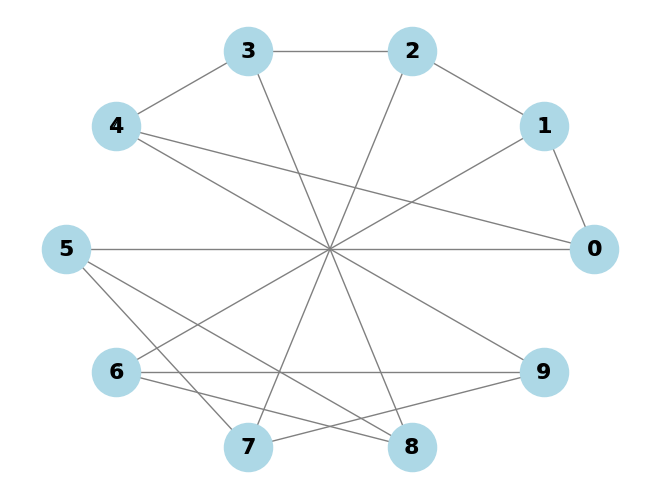

In [90]:
pos = {
    0: (0.5, 1),
    1: (1, 0.5),
    2: (0.5, 0),
    3: (0, 0.5),
    4: (0, 1),
    5: (0.5, 0.8),
    6: (0.8, 0.5),
    7: (0.5, 0.2),
    8: (0.2, 0.5),
    9: (0.2, 0.8)
}

petersen_graph = create_petersen_graph()
# circular layout
pos = nx.circular_layout(petersen_graph)
draw_petersen_graph(petersen_graph, pos)

**Pour les questions qui suivent, donnez la réponse en utilisant les fonctions de NetworkX**

Ce graphe est-il orienté ou non orienté ?

Quels sont ses sommets et ses arêtes ?

Quels sont les voisins du sommet 2 ? Quel est le degré du sommet 10 ?

Ce graphe est-il régulier ?

Ce graphe est-il connexe ?

Donnez sa matrice d’incidence et sa matrice d’adjacence

Quel est le sous-graphe induit par les sommets {6, 3, 7, 8, 1, 5} ?

Mettez en évidence (avec des arêtes rouges) un chemin hamiltonien (calculé à la main) sur le graphe de Petersen

Quelle est la taille d'un transversal minimum ? D'un couplage maximum ? D'un stable maximum ? D'une coloration minimum ?

## Exercice 2 : problème d'emploi du temps
Une école doit organiser les horaires des examens. On suppose qu’il y a 7 épreuves à planifier, correspondant
aux cours numérotés de 1 à 7 et que les paires de cours suivantes ont des étudiants communs : 1 et 2,
1 et 3, 1 et 4, 1 et 7, 2 et 3, 2 et 4, 2 et 5, 2 et 7, 3 et 4, 3 et 6, 3 et 7, 4 et 5, 4 et 6, 5 et 6, 5 et 7 et 6 et
7. Comment organiser ces épreuves de façon qu’aucun étudiant n’ait à passer deux épreuves en même temps
et cela sur une durée miminale ?